In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results

import pandas as pd

DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="./"
local_file = os.path.join(local_dir,file)

In [2]:
if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))

./DR14Q_v4_4.fits already exist


In [3]:
catalog=Table.read('DR14Q_v4_4.fits')
catalog.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'THING_ID',
 'PLATE',
 'MJD',
 'FIBERID',
 'SPECTRO',
 'Z',
 'Z_ERR',
 'SOURCE_Z',
 'Z_VI',
 'Z_PIPE',
 'Z_PIPE_ERR',
 'ZWARNING',
 'Z_PCA',
 'Z_PCA_ER',
 'Z_MGII',
 'BOSS_TARGET1',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'N_SPEC_SDSS',
 'N_SPEC_BOSS',
 'N_SPEC',
 'PLATE_DUPLICATE',
 'MJD_DUPLICATE',
 'FIBERID_DUPLICATE',
 'SPECTRO_DUPLICATE',
 'BI_CIV',
 'ERR_BI_CIV',
 'RUN_NUMBER',
 'RERUN_NUMBER',
 'COL_NUMBER',
 'FIELD_NUMBER',
 'OBJ_ID',
 'PSFFLUX',
 'IVAR_PSFFLUX',
 'PSFMAG',
 'ERR_PSFMAG',
 'MI',
 'GAL_EXT',
 'RASS_COUNTS',
 'RASS_COUNTS_SNR',
 'SDSS2ROSAT_SEP',
 'FLUX_0.2_2.0keV',
 'FLUX_0.2_2.0keV_ERR',
 'FLUX_2.0_12.0keV',
 'FLUX_2.0_12.0keV_ERR',
 'FLUX_0.2_12.0keV',
 'FLUX_0.2_12.0keV_ERR',
 'LUM_0.2_12.0keV',
 'SDSS2XMM_SEP',
 'GALEX_MATCHED',
 'FUV',
 'FUV_IVAR',
 'NUV',
 'NUV_IVAR',
 'JMAG',
 'ERR_JMAG',
 'JSNR',
 'JRDFLAG',
 'HMAG',
 'ERR_HMAG',
 'HSNR',
 'HRDFLAG',
 'KMAG',
 'ERR_K

In [4]:
catalog

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

In [5]:
w=(catalog['THING_ID']>0) & (catalog['Z']>2) & (catalog['Z']<4) & (catalog['RA']!=catalog['DEC'])& (catalog['RA']>0) & (catalog['DEC']>0)
reduced_cat=catalog[w]
reduced_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

In [6]:
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:100]
small_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
002927.12+005959.1,7.3630113436661695,0.9997557609564308,119126428,3586,55181,594,BOSS,2.197,0.0,VI,2.197000026702881,2.2041704654693604,0.0019501503556966786,0,2.2176769,2.1851583,2.1851583,81920,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.082460641860962 .. 5.404262542724609,17.25505828857422 .. 1.4724500179290771,22.39624786376953 .. 20.648351669311523,0.2337706983089447 .. 0.15968485176563263,-24.988821,0.1120922863483429 .. 0.03339763358235359,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.02334750071167946,16.08032872380867,0.013374969363212584,124.61452751266,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.288,0.163,6.699999809265137,0.9566,16.323,0.259,4.199999809265137,0.9101,12.138,0.42,2.5999999046325684,0.8814,8.777000000000001,0.163,-0.5,1.124,0000,BBCU,0.402873,1.0,1.5315462999617797e-31,3.49182712801592e-32,2.369125168884542e-31,3.257587838095501e-32,2.946421964418005e-31,8.163112961552275e-32,3.268164172192872e-31,4.075393363894775e-32,0,-1.0,-1.0,-1.0
002951.92+011450.1,7.466360282002142,1.247255758767018,124326006,3586,55181,622,BOSS,2.092,0.0,VI,2.0920000076293945,2.1335699558258057,0.0009776175720617175,0,2.1113958,2.0834067,2.0834067,16384,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.9829164743423462 .. 4.830942153930664,19.4893741607666 .. 1.8968703746795654,22.497323989868164 .. 20.765296936035156,0.24063898622989655 .. 0.15602481365203857,-24.948919,0.11912687122821808 .. 0.03549357131123543,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.034334227442741394,26.000245826780446,0.04506143182516098,34.706384627050674,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.435,0.189,5.69999

In [7]:
thing_id=small_cat['THING_ID']
fiberid=small_cat['FIBERID']
plate=small_cat['PLATE']
zqso=small_cat['Z']

In [8]:
plate_list=[]
for p,m in zip(small_cat['PLATE'],small_cat['MJD']):
    plate_list.append(str(p)+'/spPlate-'+str(p)+'-'+str(m)+'.fits')
plate_list=np.unique(plate_list)
plate_list

array(['3586/spPlate-3586-55181.fits', '3587/spPlate-3587-55182.fits',
       '3588/spPlate-3588-55184.fits', '3589/spPlate-3589-55186.fits',
       '3590/spPlate-3590-55201.fits', '3606/spPlate-3606-55182.fits',
       '3609/spPlate-3609-55201.fits', '3615/spPlate-3615-55179.fits',
       '3615/spPlate-3615-55208.fits', '3615/spPlate-3615-56544.fits'],
      dtype='<U28')

In [9]:
plates_url='https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/'
plates_local='./spPlates/'

if not os.path.exists(plates_local):
        os.makedirs(plates_local)

for plate_ in plate_list:
    url_file = os.path.join(plates_url,plate_)
    local_file=plates_local+plate_.split("/")[1]
    if not os.path.exists(local_file):
        print("downloading spplate from %s to %s"
              % (url_file, local_file))
        tmp = urllib.request.urlretrieve(url_file, local_file)
    else:
        print('%s  %s present on disk. '%(url_file,local_file))

https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3586/spPlate-3586-55181.fits  ./spPlates/spPlate-3586-55181.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3587/spPlate-3587-55182.fits  ./spPlates/spPlate-3587-55182.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3588/spPlate-3588-55184.fits  ./spPlates/spPlate-3588-55184.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3589/spPlate-3589-55186.fits  ./spPlates/spPlate-3589-55186.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3590/spPlate-3590-55201.fits  ./spPlates/spPlate-3590-55201.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3606/spPlate-3606-55182.fits  ./spPlates/spPlate-3606-55182.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3609/spPlate-3609-55201.fits  ./spPlates/spPlate-3609-55201.fits present on disk. 
https:

In [10]:
file=plates_local+plate_list[2].split("/")[1]
plate1=pyfits.open(file)
print(file)

./spPlates/spPlate-3588-55184.fits


In [11]:
plate1.info()

Filename: ./spPlates/spPlate-3588-55184.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     229   (4647, 1000)   float32   
  1  IVAR          1 ImageHDU        16   (4647, 1000)   float32   
  2  ANDMASK       1 ImageHDU        15   (4647, 1000)   int32   
  3  ORMASK        1 ImageHDU        15   (4647, 1000)   int32   
  4  WAVEDISP      1 ImageHDU        16   (4647, 1000)   float32   
  5  PLUGMAP       1 BinTableHDU     88   1000R x 35C   [5J, 6A, D, D, 5E, E, E, E, 16A, D, D, J, J, J, J, J, J, E, 21A, E, E, J, K, K, K, K, J, 4A, J, J, J, 5E, 5E, 5J, E]   
  6  SKY           1 ImageHDU         8   (4647, 1000)   float32   


In [12]:
plugmap=plate1['PLUGMAP'].data
Table(plugmap)

OBJID [5],HOLETYPE,RA,DEC,MAG [5],STARL,EXPL,DEVAUCL,OBJTYPE,XFOCAL,YFOCAL,SPECTROGRAPHID,FIBERID,THROUGHPUT,PRIMTARGET,SECTARGET,OFFSETID,SCI_EXPTIME,SOURCETYPE,LAMBDA_EFF,ZOFFSET,BLUEFIBER,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,RUN,RERUN,CAMCOL,FIELD,ID,CALIBFLUX [5],CALIBFLUX_IVAR [5],CALIB_STATUS [5],SFD_EBV
int32,str6,float64,float64,float32,float32,float32,float32,str16,float64,float64,int32,int32,int32,int32,int32,int32,float32,str21,float32,float32,int32,int64,int64,int64,int64,int32,str4,int32,int32,int32,float32,float32,int32,float32
2728 .. 124,OBJECT,11.382137999999998,-0.028145161,23.1102 .. 18.8796,0.0,0.0,0.0,GALAXY,301.32296,-6.1338778,1,1,32026,0,0,1,0.0,LRG,5400.0,0.0,0,9,0,0,0,2728,301,3,489,124,1.1782539 .. 58.678192,5.320078 .. 0.20767432,24577 .. 24577,0.015352863
0 .. 0,OBJECT,11.480943000000025,-0.1143519,26.572 .. 21.939,0.0,0.0,0.0,NA,323.06207,-24.943743,1,2,36757,0,0,1,0.0,QSO_GRI,5400.0,0.0,1,0,0,536870912,0,0,,0,0,0,0.30778626 .. 1.4333534,15.011751 .. 1.1993102,24577 .. 24577,0.016157152
4263 .. 485,OBJECT,11.410420999999985,-0.28305497,24.1479 .. 20.822,0.0,0.0,0.0,GALAXY,307.58125,-61.727048,1,3,36676,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,4263,301,3,192,485,0.28030014 .. 9.6534,9.12571 .. 0.36943063,24577 .. 24577,0.017159209
2728 .. 165,OBJECT,11.413002000000006,-0.06723294,22.4935 .. 21.353,0.0,0.0,0.0,QSO,308.10264,-14.630038,1,4,30125,0,0,1,0.0,QSO,4000.0,0.0,1,65536,0,0,0,2728,301,3,489,165,2.093434 .. 4.789381,17.604595 .. 1.7493329,24577 .. 24577,0.015407031
2728 .. 350,OBJECT,11.370152000000019,-0.042618017,23.824 .. 20.9157,0.0,0.0,0.0,GALAXY,298.6931,-9.288649,1,5,39729,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,2728,301,3,489,350,0.4969688 .. 8.739886,6.0304847 .. 0.33227256,24577 .. 24577,0.01523817
0 .. 0,OBJECT,11.350979999999993,0.038246182,0.0 .. 0.0,0.0,0.0,0.0,SKY,294.4878,8.3391139,1,6,30231,0,0,1,0.0,NA,5400.0,0.0,1,0,0,0,0,0,,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.014600264
2728 .. 611,OBJECT,11.457323999999971,-0.067333797,24.1476 .. 20.8979,0.0,0.0,0.0,GALAXY,317.85281,-14.68401,1,7,33974,0,0,1,0.0,LRG,5400.0,0.0,0,14,0,0,0,2728,301,3,489,611,0.2812808 .. 8.899108,6.235111 .. 0.316698,24577 .. 24577,0.016051836
4263 .. 249,OBJECT,11.308869000000016,-0.33872519,22.3747 .. 21.0934,0.0,0.0,0.0,QSO,285.30313,-73.804892,1,8,34094,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,4263,301,3,191,249,2.4854016 .. 6.269193,26.228327 .. 2.2249532,24577 .. 24577,0.0151739605
2728 .. 550,OBJECT,11.438775000000021,-0.01381775,23.4368 .. 20.9568,0.0,0.0,0.0,GALAXY,313.76776,-3.0111716,1,9,34845,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,2728,301,3,489,550,0.81547946 .. 8.444346,5.949246 .. 0.3295001,24577 .. 24577,0.016044602


In [13]:
thisplate=plate_list[2].split("/")[0]
w=plate==int(thisplate)
ids_=fiberid[w]
zqso_=zqso[w]

In [14]:
w=np.in1d(plugmap['FIBERID'],ids_)
small_plugmap=plugmap[w]
Table(small_plugmap)

OBJID [5],HOLETYPE,RA,DEC,MAG [5],STARL,EXPL,DEVAUCL,OBJTYPE,XFOCAL,YFOCAL,SPECTROGRAPHID,FIBERID,THROUGHPUT,PRIMTARGET,SECTARGET,OFFSETID,SCI_EXPTIME,SOURCETYPE,LAMBDA_EFF,ZOFFSET,BLUEFIBER,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,RUN,RERUN,CAMCOL,FIELD,ID,CALIBFLUX [5],CALIBFLUX_IVAR [5],CALIB_STATUS [5],SFD_EBV
int32,str6,float64,float64,float32,float32,float32,float32,str16,float64,float64,int32,int32,int32,int32,int32,int32,float32,str21,float32,float32,int32,int64,int64,int64,int64,int32,str4,int32,int32,int32,float32,float32,int32,float32
4247 .. 718,OBJECT,8.609286999999995,0.43390398,24.4282 .. 21.2603,0.0,0.0,0.0,QSO,-303.31522,94.667707,2,510,20902,0,0,1,0.0,QSO,4000.0,0.0,1,201728,0,0,0,4247,301,5,166,718,0.027207524 .. 7.9276724,41.328213 .. 2.4501188,24577 .. 24577,0.023727499
2728 .. 124,OBJECT,8.840054800000019,0.32804696,21.5524 .. 20.1111,0.0,0.0,0.0,QSO,-252.71777,71.500976,2,531,31385,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,2728,301,4,472,124,5.4657245 .. 18.707598,9.604131 .. 1.0337118,24577 .. 24577,0.02560444
2728 .. 109,OBJECT,9.127879399999983,1.0890749,21.238 .. 20.3946,0.0,0.0,0.0,QSO,-190.12144,237.46443,2,542,26992,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,2728,301,6,474,109,6.5646873 .. 13.541123,9.037404 .. 1.1003689,24577 .. 24577,0.019053401
2728 .. 119,OBJECT,9.154982700000005,1.0540228,20.73 .. 19.8768,0.0,0.0,0.0,QSO,-184.17475,229.77254,2,544,34839,0,0,1,0.0,QSO,4000.0,0.0,1,250880,0,0,0,2728,301,6,474,119,10.947064 .. 21.82339,6.778867 .. 1.0285338,24577 .. 24577,0.019327328
4247 .. 405,OBJECT,9.285265900000013,0.48217577,23.9399 .. 21.0147,0.0,0.0,0.0,QSO,-155.62899,105.01629,2,570,36137,0,0,1,0.0,QSO,4000.0,0.0,1,66560,0,0,0,4247,301,5,171,405,0.13410223 .. 6.5540667,42.57581 .. 2.5627565,24577 .. 24577,0.023703171
4128 .. 539,OBJECT,9.475506800000005,0.73854072,23.1736 .. 22.1007,0.0,0.0,0.0,QSO,-114.20935,160.84517,2,608,38723,0,0,1,0.0,QSO,4000.0,0.0,1,197632,0,0,0,4128,301,5,186,539,1.133782 .. 1.7723988,15.869436 .. 1.2619082,24577 .. 24577,0.020222092
2728 .. 254,OBJECT,9.59560620000002,0.24417123,22.8584 .. 22.246,0.0,0.0,0.0,QSO,-87.981811,53.148312,2,657,31211,0,0,1,0.0,QSO,4000.0,0.0,1,131072,0,0,0,2728,301,4,477,254,1.5910642 .. 1.9950564,13.630089 .. 1.2745118,24577 .. 24577,0.020373492
2728 .. 580,OBJECT,9.777702599999998,0.27370017,23.7745 .. 21.7526,0.0,0.0,0.0,QSO,-48.350271,59.555001,2,694,46848,0,0,1,0.0,QSO,4000.0,0.0,1,196608,0,0,0,2728,301,4,478,580,0.49154624 .. 3.5955884,16.913847 .. 1.1224526,24577 .. 24577,0.018352574
2728 .. 282,OBJECT,10.108852000000013,0.39493532,22.381 .. 21.7696,0.0,0.0,0.0,QSO,23.678527,85.933118,2,740,27896,0,0,1,0.0,QSO,4000.0,0.0,1,4096,0,0,0,2728,301,4,480,282,2.35942 .. 3.392507,11.2415905 .. 1.124278,24577 .. 24577,0.01730938


In [15]:
pltheader=plate1[0].header
coeff0=pltheader['COEFF0']
coeff1=pltheader['COEFF1']


In [16]:
flux=plate1[0].data
ivar=plate1[1].data
wavelengths=10**(coeff0+coeff1*np.arange(flux.shape[1]))

In [17]:
wavelengths

array([ 3553.03920815,  3553.85741986,  3554.67581999, ...,
       10351.42166679, 10353.80544415, 10356.18977045])

In [18]:
flux = flux[ids_-1]
ivar = ivar[ids_-1]
zqso_

3.23
2.36
2.4530000000000003
2.287
3.033
2.276
2.035
2.3819999999999997
2.188
2.544
2.364


In [19]:
from sklearn.decomposition import PCA
n_components = 5
spec_mean = flux.mean(0)

    # PCA: use randomized PCA for speed
pca = PCA(n_components - 1, random_state=0, svd_solver='randomized')
pca.fit(flux)
pca_comp = np.vstack([spec_mean,pca.components_])

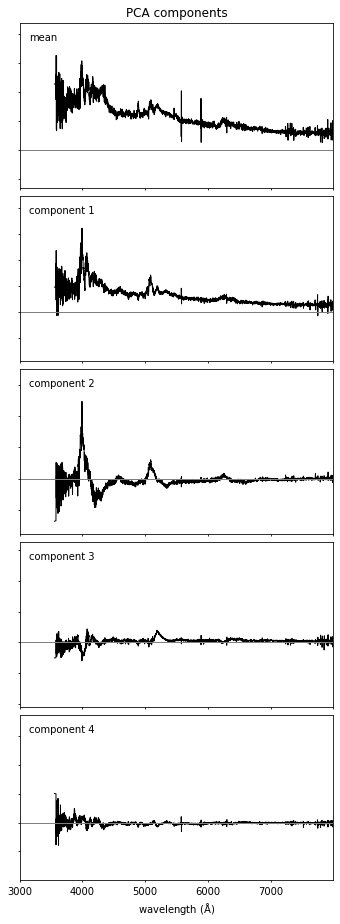

In [20]:
# Plot the results
fig = plt.figure(figsize=(15, 14))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components']

for i, comp in enumerate([pca_comp]):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(3000, 7999, 1000))))
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
        
        ax.plot(wavelengths, comp[j], '-k', lw=1)
        
        # plot zero line
        xlim = [3000, 8000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)


3.23
2.36
2.4530000000000003
2.287
3.033
2.276
2.035
2.3819999999999997
2.188
2.544


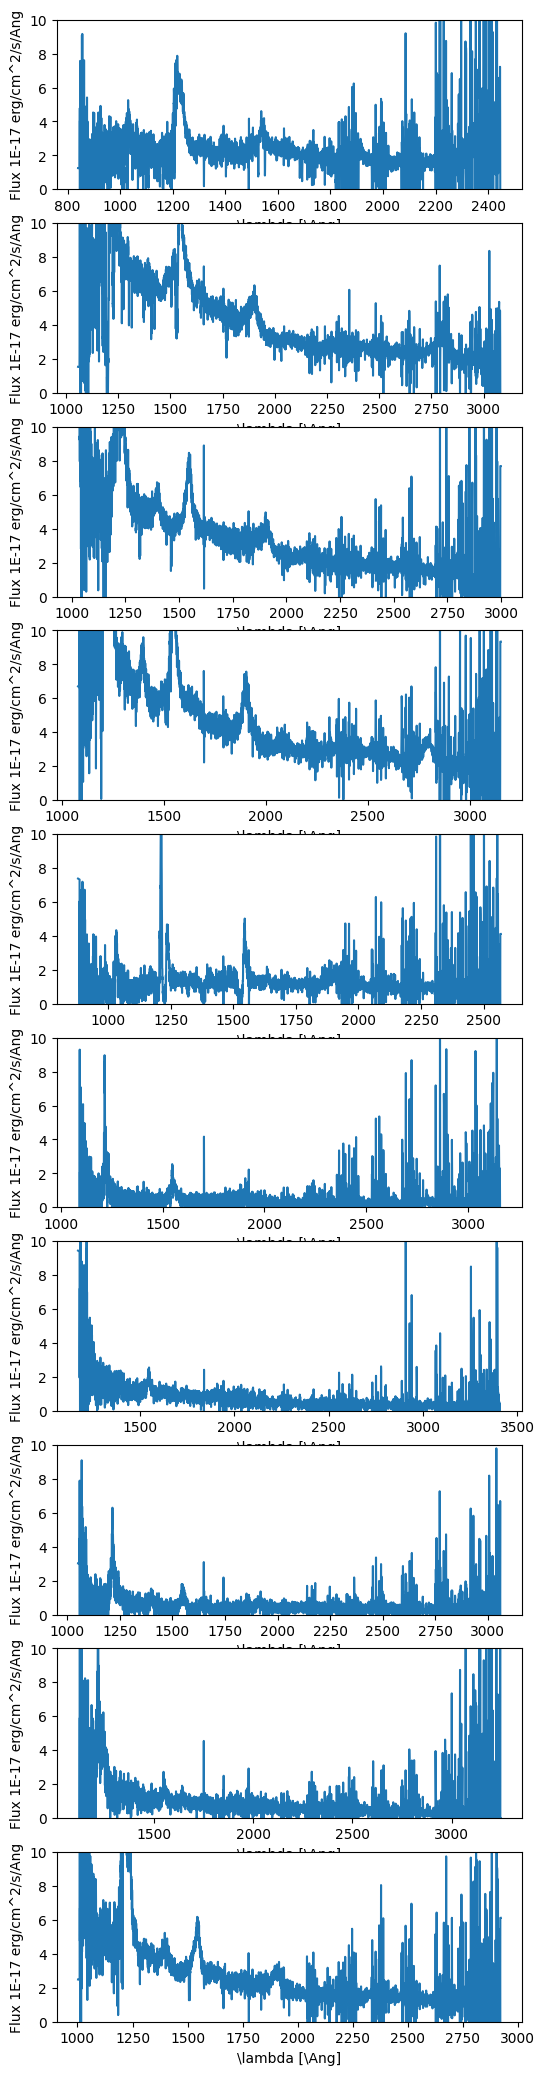

In [24]:
plt.figure(figsize=(6,40),dpi=100)
i = 0
for i in range (10):
    plt.subplot(len(ids_),1,i+1)
    zq=zqso_[i]
    print(zq)
    plt.plot(wavelengths/(1+zq),flux[i])
    plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
    plt.xlabel('\lambda [\Ang]')
    plt.ylim(0,10)
    i+=1

3.23
2.36
2.4530000000000003
2.287
3.033


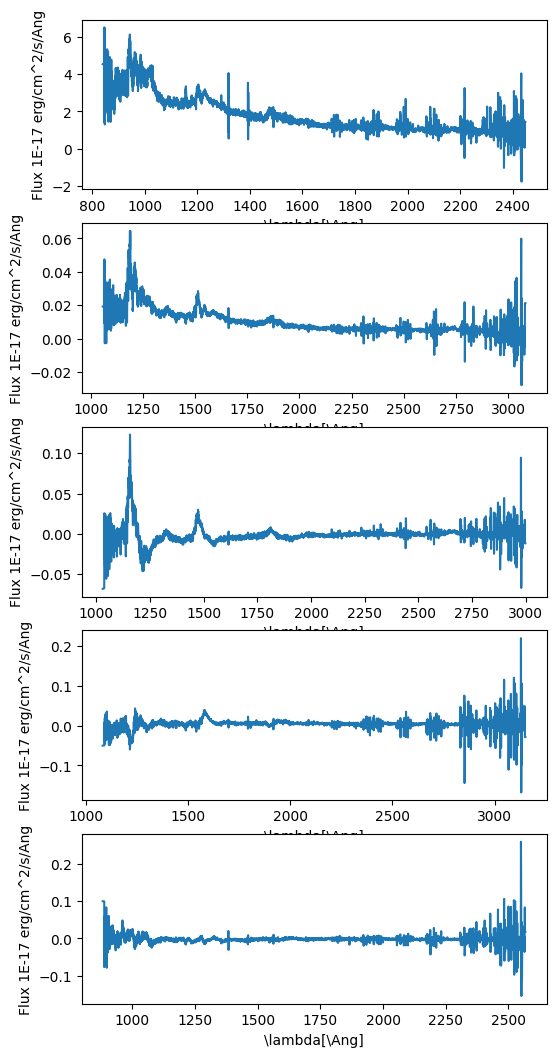

In [47]:
plt.figure(figsize=(6,40),dpi=100)
i = 0
for i in range (5):
    plt.subplot(len(ids_),1,i+1)
    zq=zqso_[i]
    print(zq)
    plt.plot(wavelengths/(1+zq),comp[i])
    plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
    plt.xlabel('\lambda[\Ang]')
    #plt.ylim(0,10)
    i+=1

In [34]:
pca_comp

array([[ 4.52965879,  4.52831793,  4.52697897, ...,  1.44405019,
         1.44409013,  1.4441303 ],
       [ 0.01926743,  0.01926028,  0.01925315, ...,  0.02131574,
         0.02131622,  0.0213167 ],
       [-0.06796491, -0.06794328, -0.0679217 , ..., -0.011608  ,
        -0.01160836, -0.01160872],
       [-0.05026558, -0.05025041, -0.05023527, ..., -0.02878585,
        -0.02878657, -0.02878729],
       [ 0.10049725,  0.10046692,  0.10043665, ...,  0.01764529,
         0.01764554,  0.01764579]])

In [45]:
np.shape(wavelengths)

(4647,)

In [46]:
wavelengths

array([ 3553.03920815,  3553.85741986,  3554.67581999, ...,
       10351.42166679, 10353.80544415, 10356.18977045])